In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
path = Path('C:/users/karth/kaggle/disaster/data')

In [4]:
path.ls()

[WindowsPath('C:/users/karth/kaggle/disaster/data/data_lm.pkl'),
 WindowsPath('C:/users/karth/kaggle/disaster/data/models'),
 WindowsPath('C:/users/karth/kaggle/disaster/data/test.csv'),
 WindowsPath('C:/users/karth/kaggle/disaster/data/train.csv')]

In [5]:
df = pd.read_csv(path/'train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
bs = 32

In [7]:

data_lm = TextLMDataBunch.from_csv(path,'train.csv',valid_pct=0.1,test='test.csv',text_cols=3,bs=bs)      


In [8]:
data_lm.save('data_lm.pkl')

In [9]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [10]:
data_lm.show_batch()

idx,text
0,- period ' xxmaj tom xxmaj waits . xxbos xxunk xxmaj we need help ! xxmaj horses will die!please xxup rt & & sign petition!take a stand & & be a voice for them ! # gilbert23 https : / / t.co / e8dl1lncvu xxbos xxunk i 'll start a big ass riot send me to jail today mfs xxunk xxrep 4 d ? ? xxbos xxunk xxmaj thanks for
1,/ xxunk xxbos xxmaj there is this old lady rockin out to death metal in her xxunk downtown smoking a cigarette . i found my real mom . xxbos xxmaj do n't let a few assholes ruin your night xxbos ' imagine an entire xxunk dedicated to making people look like xxunk refugees . ' - director of whole xxunk xxunk section xxbos [ xxmaj xxunk : xxmaj you must
2,: / / t.co / xxunk xxbos xxmaj reddit updates content policy promises to quarantine û÷extremely offensiveûª communities http : / / t.co / xxunk xxbos xxmaj strong xxmaj thunderstorm 4 xxmaj miles xxmaj north of xxmaj japton xxmaj moving xxup se xxmaj at 25 xxup mph . xxmaj large xxmaj hail and xxmaj wind xxmaj gusts xxmaj up to 50 xxup mph xxmaj poss ... # arwx http :
3,killed and 26 others injured when two buses collided i ... http : / / t.co / xxunk xxbos xxmaj interview on xxmaj the xxmaj collapse of xxmaj xxunk xxmaj best # talkradio xxmaj listen xxmaj live : http : / / t.co / xxunk xxbos xxup disaster xxup averted : xxmaj police kill gunman with xxunk xxunk xxunk http : / / t.co / xxunk xxbos xxunk destroy the
4,xxmaj banned xxmaj tomatoes xxmaj from xxmaj destruction on # xxmaj russian xxmaj border http : / / t.co / xxunk # news xxbos http : / / t.co / xxunk \n xxup another xxup disaster xxup waiting xxup to xxup happen xxup and xxup your xxup xxunk xxup it ? ? ? xxbos 320 [ xxup ir ] xxup icemoon [ xxup aftershock ] | http : /


In [15]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


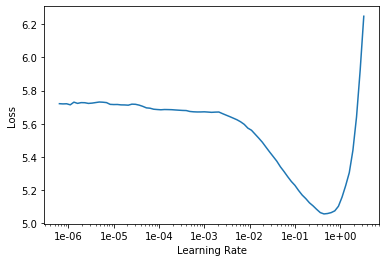

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(1, 3e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.872318,3.281676,0.438145,00:04


In [19]:
learn.save('fit_head')

In [20]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (6851 items)
x: LMTextList
xxbos xxmaj ignition xxmaj knock ( xxmaj detonation ) xxmaj sensor - xxmaj senso xxmaj standard fits 03 - 08 xxmaj xxunk 6 xxup xxunk - xxup xxunk http : / / t.co / xxunk http : / / t.co / xxunk,xxbos xxunk xxmaj it 's a well - known fact that the xxmaj st xxmaj xxunk 's xxmaj day massacre could have been avoided with some ' xxunk - period ' xxmaj tom xxmaj waits .,xxbos xxunk xxmaj we need help ! xxmaj horses will die!please xxup rt & & sign petition!take a stand & & be a voice for them ! # gilbert23 https : / / t.co / e8dl1lncvu,xxbos xxunk i 'll start a big ass riot send me to jail today mfs xxunk xxrep 4 d ? ?,xxbos xxunk xxmaj thanks for joining the foot . xxunk
y: LMLabelList
,,,,
Path: C:\users\karth\kaggle\disaster\data;

Valid: LabelList (762 items)
x: LMTextList
xxbos xxmaj add these xxunk to your everyday eating xxunk . xxmaj please do the research on how to take with your xxunk _ https : / / 

In [21]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(5, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.193005,3.273968,0.435516,00:05
1,3.256079,3.206064,0.459425,00:05
2,3.001140,3.125011,0.475694,00:05
3,2.498522,3.077479,0.490625,00:05
4,1.817906,3.182944,0.490923,00:05


In [23]:
learn.save('fine_tuned')

In [24]:
learn.load('fine_tuned');

In [25]:
TEXT = "Look how this"
N_WORDS = 10
N_SENTENCES = 1

In [27]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Look how this was a crime describing . It 's a simple


In [28]:
learn.save_encoder('fine_tuned_enc')

## **Classifier**

In [42]:
data_clas = TextClasDataBunch.from_csv(path,'train.csv',valid_pct=0.1,test='test.csv',text_cols=3,label_cols=4,vocab = data_lm.vocab,bs=bs)      
data_clas.save('data_clas.pkl')

In [43]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [44]:
data_clas.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup followback \n xxrep 7 ? \n xxrep 5 ? xxup gain xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n \n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
xxbos xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co / xxunk,1
xxbos xxmaj rare xxunk into # terror and xxmaj how to fight it http : / / t.co / xxunk # xxmaj cameroon # xxup usa # xxmaj xxunk # xxup xxunk # xxup fr # xxmaj nigeria # xxup uk # xxmaj africa # xxup de # xxup ca # xxup xxunk # xxup jp,1
xxbos xxmaj learn xxmaj how i xxmaj gained xxmaj access xxmaj to xxmaj the xxmaj secrets xxmaj of xxmaj the xxmaj top xxmaj earners & & xxmaj used xxmaj them xxmaj to xxmaj explode xxmaj my xxmaj home xxmaj business xxmaj here : http : / / t.co / xxunk xxmaj please # xxup rt,0


In [45]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6851 items)
x: TextList
xxbos # modiministry xxmaj railway xxmaj minister xxmaj prabhu calls xxup mp derailment a natural calamity http : / / t.co / xxunk,xxbos i hate that i m so awkward and i ruin things,xxbos . / xxrep 5 . hmm 12000 xxmaj nigerian refugees repatriated from xxmaj cameroon http : / / t.co / xxunk / (,xxbos xxmaj jack xxmaj wilshere has poor injury xxunk his off field xxunk does n't help . # xxmaj arsenal,xxbos xxmaj islamic xxmaj state group in xxmaj egypt threatens to kill xxmaj croat hostage http : / / t.co / xxunk
y: CategoryList
1,0,1,1,1
Path: C:\users\karth\kaggle\disaster\data;

Valid: LabelList (762 items)
x: TextList
xxbos xxmaj xxunk xxmaj energy - xxmaj all - xxmaj in xxmaj xxunk xxmaj fall xxmaj off a xxmaj cliff http : / / t.co / xxunk,xxbos xxmaj one of these xxunk is going to have a xxmaj frank xxmaj xxunk level meltdown with how xxunk love xxmaj trump no matter what . http : / / t.co / xxunk,xxbos x

In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


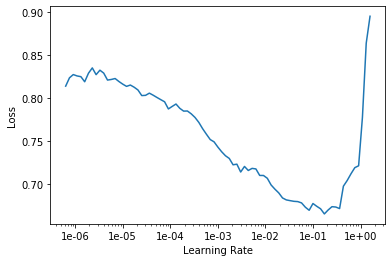

In [47]:
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.511333,0.468567,0.787402,00:31


In [49]:
learn.save('first')

In [52]:
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6851 items)
x: TextList
xxbos # modiministry xxmaj railway xxmaj minister xxmaj prabhu calls xxup mp derailment a natural calamity http : / / t.co / xxunk,xxbos i hate that i m so awkward and i ruin things,xxbos . / xxrep 5 . hmm 12000 xxmaj nigerian refugees repatriated from xxmaj cameroon http : / / t.co / xxunk / (,xxbos xxmaj jack xxmaj wilshere has poor injury xxunk his off field xxunk does n't help . # xxmaj arsenal,xxbos xxmaj islamic xxmaj state group in xxmaj egypt threatens to kill xxmaj croat hostage http : / / t.co / xxunk
y: CategoryList
1,0,1,1,1
Path: C:\users\karth\kaggle\disaster\data;

Valid: LabelList (762 items)
x: TextList
xxbos xxmaj xxunk xxmaj energy - xxmaj all - xxmaj in xxmaj xxunk xxmaj fall xxmaj off a xxmaj cliff http : / / t.co / xxunk,xxbos xxmaj one of these xxunk is going to have a xxmaj frank xxmaj xxunk level meltdown with how xxunk love xxmaj trump no matter what . http : / / t.co / xxunk,xxbos x

In [51]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.500595,0.463257,0.783465,00:31
1,0.477500,0.442915,0.787402,00:31


In [54]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.444205,0.466143,0.791339,00:34


In [57]:
learn.load('third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6851 items)
x: TextList
xxbos # modiministry xxmaj railway xxmaj minister xxmaj prabhu calls xxup mp derailment a natural calamity http : / / t.co / xxunk,xxbos i hate that i m so awkward and i ruin things,xxbos . / xxrep 5 . hmm 12000 xxmaj nigerian refugees repatriated from xxmaj cameroon http : / / t.co / xxunk / (,xxbos xxmaj jack xxmaj wilshere has poor injury xxunk his off field xxunk does n't help . # xxmaj arsenal,xxbos xxmaj islamic xxmaj state group in xxmaj egypt threatens to kill xxmaj croat hostage http : / / t.co / xxunk
y: CategoryList
1,0,1,1,1
Path: C:\users\karth\kaggle\disaster\data;

Valid: LabelList (762 items)
x: TextList
xxbos xxmaj xxunk xxmaj energy - xxmaj all - xxmaj in xxmaj xxunk xxmaj fall xxmaj off a xxmaj cliff http : / / t.co / xxunk,xxbos xxmaj one of these xxunk is going to have a xxmaj frank xxmaj xxunk level meltdown with how xxunk love xxmaj trump no matter what . http : / / t.co / xxunk,xxbos x

In [56]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.334243,0.501551,0.787402,00:37
1,0.308405,0.515977,0.779528,00:36


In [67]:
learn.predict("People were panicked")

C:\Users\karth\AppData\Local\Continuum\anaconda3\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


(Category 1, tensor(1), tensor([0.4692, 0.5308]))